Este notebook é uma coleção de funções e c´digos desenvolvidos durante as aulas de Métodos Computacionais em Física. Essas Funções foram escritas para diversas atividades e finalidades e para facilitar a consulta eu compilei todas em um único notebook, já que várias dessas funções são reutilizáveis.

In [50]:
import numpy as np
import matplotlib.pyplot as plt

***

##Mapa Logístico##


Essa função calcula uma expressão de recorrência do tipo x_n+1=f_(x_n). A expressão usada aqui é a da equação logística (*eq(r,x)* = r\*x\*(1-x)) com o diagrama de bifurcação plotado ao final. A função *x_n* executa N iterações da função *eq* dada e retorna um vetor com os últimos 3 valores da iteração.

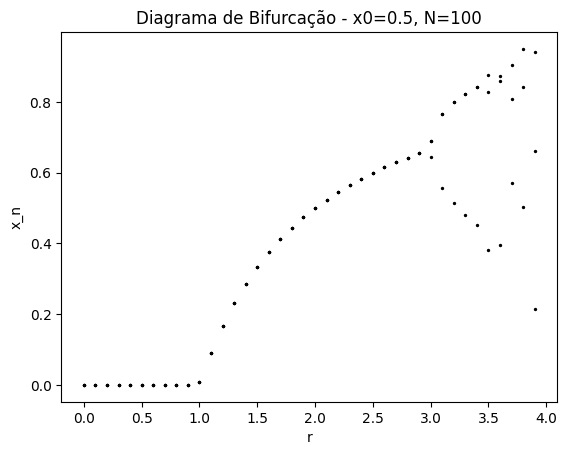

In [51]:
#x0: condição inicial
x0 = float(input())
#N: número de iterações a serem executadas.
N = int(input())
#dr: passo do parâmetro r
dr = float(input())

rvec = np.arange(0,4,dr)
Nr = np.size(rvec)
output = []

def eq(x,r):
  return r*x*(1-x)

def xn(x0,r,N):
  v = []
  for n in range(N-1):
    if (n == 0):
      v.append(eq(x0,r))
    if (n > 0 and n<4):
      v.append(eq(v[-1],r))
    if (n >= 4):
      v.append(eq(v[-1],r))
      v.pop(0)
  return v

for i in rvec:
  output.append(xn(x0,i,N))

plt.title(f'Diagrama de Bifurcação - x0={x0}, N={N}')
plt.xlabel('r')
plt.ylabel('x_n')
plt.scatter(rvec,np.transpose(np.array(output))[-1],s=2,c='black')
plt.scatter(rvec,np.transpose(np.array(output))[-2],s=2,c='black')
plt.scatter(rvec,np.transpose(np.array(output))[-3],s=2,c='black')
plt.show()

***

##Leis de Newton e movimento em 1D##


Nesse exercício um objeto de massa m é sujeito a uma força constante F e a um arrasto do tipo *-Bv^2*. O tempo é discretizado e o último passo é dado pelo método de Euler (integração).

*m* é a massa do objeto.

*F* é a força constante.

*B* é a constante da força de arrasto.

*N* é o número de passos no tempo.

*dt* é o tamanho do passo de integração.

*epsilon* é o erro esperado para a velocidade limite.

o código imprime *vlim* que é a velocidade limite para tempos longos e plota a velocidade limite para alguns valores de *B*. 

*f* define a função das forças aplicáveis ao sistema.

*euler* calcula o passo da integração pelo metodo de Euler.

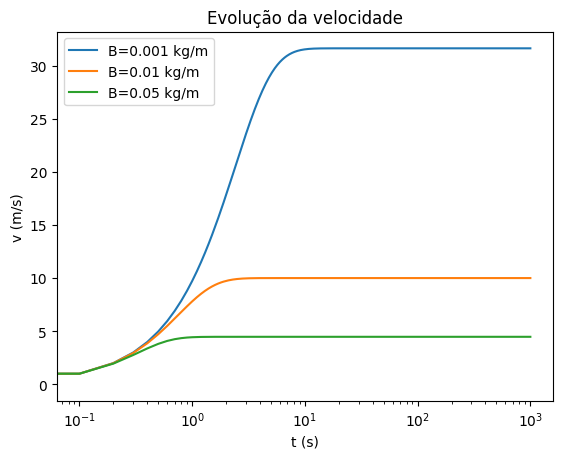

In [52]:
M=0.1
F=1
B=0.001
V0=0

def g(v):
    return (F/M)-(B/M)*(v**2)

def euler_by_error(f, v0, dt, epsilon):
  v = [v0]
  v.append(v[-1] + f(v[-1])*dt)
  while epsilon<v[-1]-v[-2]:
    v.append(v[-1] + f(v[-1])*dt)
  t = np.arange(0,dt*len(v),dt)
  return t,v

def euler_by_time(f, v0, dt, tf):
  N = int(np.floor(tf/dt))
  v = [v0]
  v.append(v[-1] + f(v[-1])*dt)
  for n in range(N-1):
    v.append(v[-1] + f(v[-1])*dt)
  t = np.arange(0,dt*len(v),dt)
  return t,v

#print("{:10.6e}".format( euler_by_time(g,V0,1000)[-1]))

plt.title(f'Evolução da velocidade')
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
t,v = euler_by_time(g,V0,0.1,1000)
plt.plot(t,v, label=f'B={B} kg/m')
B=0.01
t,v = euler_by_time(g,V0,0.1,1000)
plt.plot(t,v, label=f'B={B} kg/m')
B=0.05
t,v = euler_by_time(g,V0,0.1,1000)
plt.plot(t,v, label=f'B={B} kg/m')
plt.xscale('log')
plt.legend()
plt.show()

***

##Mecânica: Lançamento de Projéteis##


Nessa lição utilizamos o método de Euler (da lição anterior) para resolver a equação de movimento do lançamento de um projétil com velocidade inicial v0 e ângulo theta. A função de Euler pode receber um vetor também basta definirmos a função das equações do sistema usando vetores.


*g* é a constante gravitacional

*theta* é uma lista de ângulos iniciais

*v0* é o módulo da velocidade inicial

*x0,y0* é a posição inicial


Esta célula plota a trajetória do projétil de t=0 a t=tf segundos;

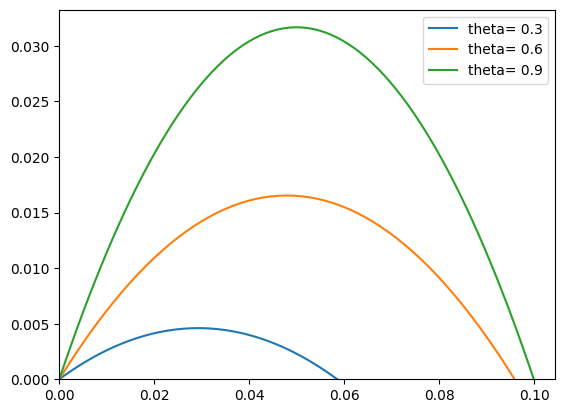

In [53]:
g = 9.80665
tf = 10
theta = [0.3,0.6,0.9]
v0 = 1
x0 = 0
y0 = 0

#V=np.array([x0, y0, v0*np.cos(theta), v0*np.sin(theta)])

def g_projectile(v):
  u = [v[2], v[3], 0, -g]
  return np.array(u)

xmax = []
ymax = []

for i in theta:
  V=np.array([x0, y0, v0*np.cos(i), v0*np.sin(i)])
  t,v = euler_by_time(g_projectile, V, 0.001, tf)
  v = np.transpose(v)
  xmax.append(np.argwhere(v[1]>=0)[-1][0])
  ymax.append(np.argmax(v[1]))
  plt.plot(v[0],v[1], label=f'theta= {i}')

plt.ylim(bottom=0, top=v[1][ymax[np.argmax(ymax)]]*1.05)
plt.xlim(left=0, right=v[0][xmax[np.argmax(xmax)]]*1.05)
plt.legend()
plt.show()

***

###Runge Kutta e Euler###


Nessa lição estudamos outro método de integração de equações, o método de Runge Kutta de 2ª ordem e comparamos com o método de Euler. O teste é realizado utilizando um oscilador harmônico (F=-kx). O gráfico mostra a diferença de precisão entre os dois métodos, O método de Euler tende a divergir a Energia, com o acumulo das iterações, muito mais rápido que o método de Runge Kutta, note queo método de runge Kutta parece constante (como esperado para a euqação do oscilador) porém existe uma divergência, porém lenta de mais para ser notada neste gráfico.

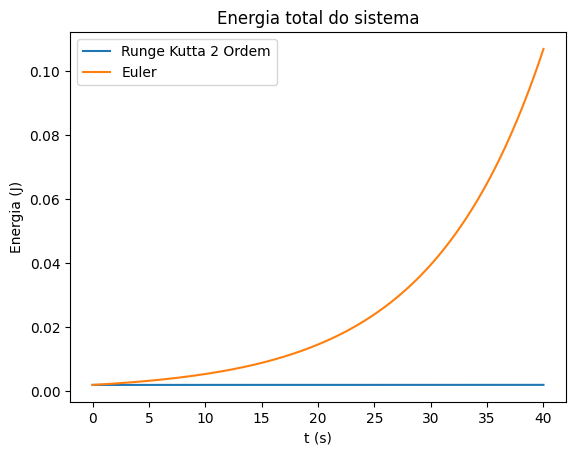

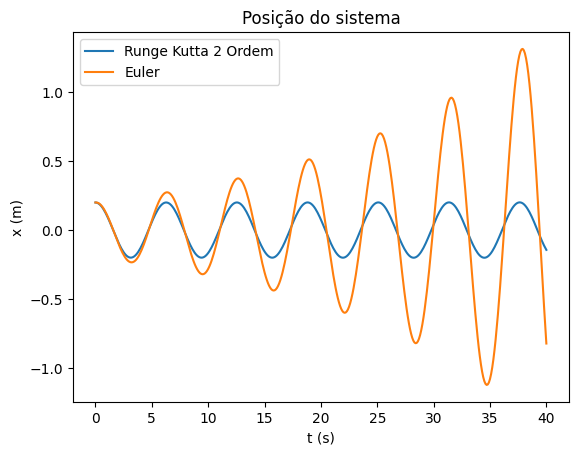

In [54]:
m = 0.1
k = 0.1
tN = 40
dt = 0.1
x0 = 0.2
v0 = 0

tvec=np.arange(0.0,tN+dt,dt)
Nt=np.size(tvec);
xEuler=np.zeros(Nt);
vEuler=np.zeros(Nt);
EnEuler=np.zeros(Nt);
xRK2=np.zeros(Nt);
vRK2=np.zeros(Nt);
EnRK2=np.zeros(Nt);

xEuler[0] = x0
xRK2[0] = x0
vEuler[0] = v0
vRK2[0] = v0
EnEuler[0] = (1/2)*m*(v0**2) + (1/2)*k*(x0**2)
EnRK2[0] = (1/2)*m*(v0**2) + (1/2)*k*(x0**2)

def euler():
    for t in range(Nt-1):
        xEuler[t+1] = xEuler[t]+vEuler[t]*dt
        vEuler[t+1] = vEuler[t]-(k/m)*xEuler[t]*dt
        EnEuler[t+1] = (1/2)*m*(vEuler[t+1]**2) + (1/2)*k*(xEuler[t+1]**2)

def RK2():
    for t in range(Nt-1):
        kx1 = vRK2[t]*dt
        kv1 = -(k/m)*xRK2[t]*dt
        xmeio = xRK2[t]+kx1/2
        vmeio = vRK2[t]+kv1/2
        kx2 = vmeio*dt
        kv2 = -(k/m)*xmeio*dt
        xRK2[t+1] = xRK2[t]+kx2
        vRK2[t+1] = vRK2[t]+kv2
        EnRK2[t+1] = (1/2)*m*(vRK2[t+1]**2) + (1/2)*k*(xRK2[t+1]**2)

euler()
RK2()

plt.plot(tvec,EnRK2, label="Runge Kutta 2 Ordem")
plt.plot(tvec,EnEuler, label='Euler')
plt.title('Energia total do sistema')
plt.xlabel('t (s)')
plt.ylabel('Energia (J)')
plt.legend()
plt.show()

plt.plot(tvec,xRK2, label="Runge Kutta 2 Ordem")
plt.plot(tvec,xEuler, label='Euler')
plt.title('Posição do sistema')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.legend()
plt.show()